## 1. box plot에 대한 개념

Box plot은 데이터 분포를 시각화하는 방법 중 하나로, 데이터의 중앙값, 분포 범위, 이상치를 한눈에 파악할 수 있음

- 제1사분위수 (Q1) : 데이터를 크기순으로 정렬했을 때, 1/4 지점에 해당하는 값
- 중앙값 (median) : 데이터를 크기순으로 정렬했을 때, 가운데에 위치하는 값
- 제3사분위수 (Q3) : 데이터를 크기순으로 정렬했을 때, 3/4 지점에 해당하는 값
- IQR (Interquartile Range) : 데이터의 중간값을 기준으로 1사분위수(Q1)와 3사분위수(Q3) 사이의 범위
- lower whisker : 1사분위수(Q1)에서 1.5*IQR만큼 떨어진 지점 중 가장 작은 값
- upper whisker : 3사분위수(Q3)에서 1.5*IQR만큼 떨어진 지점 중 가장 큰 값
- 이상치 : lower whisker보다 작거나, upper whisker보다 큰 값

이러한 정보를 바탕으로 box plot은 데이터의 분포 형태를 파악



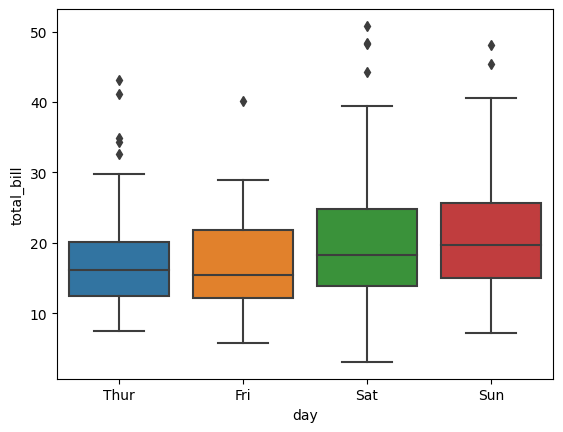

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터
tips = sns.load_dataset("tips")

# box plot 생성
sns.boxplot(x="day", y="total_bill", data=tips)

# 그래프 출력
plt.show()


## 2. 시각화 라이브러리의 차이점( sns / plt / pandas 용도)

- matplotlib.pyplot (plt) : 파이썬에서 가장 기본적으로 사용되는 시각화
- seaborn (sns) : 통계적 그래프에 최적
- pandas : 데이터프레임 자체적시각화 기능 지원

# <AI 학습>
## 데이터 전처리 -> 알고리즘에서 어떤 식으로 학습하는지에 대한 논리적 설명(코드X)


- 데이터 전처리는 모델이 데이터를 잘 이해하고, 예측하는 데 중요한 역할을 하여 모델의 정확도를 높임. 예를 들어, 성별이나 나이 같은 변수는 모델에서 중요한 역할을 하므로, 해당 변수를 전처리하여 더 정확한 예측을 할 수 있음.
- 데이터 전처리는 데이터를 분석 가능한 형태로 가공하는 것을 의미함. 이 과정에서는 결측치 처리, 이상치 처리, 범주화, 인코딩 등의 과정을 거치게 됨.

**fair가 높을수록 생존률이 높고, sex가 female의 생존률이 높은데, 이 둘을 합쳐 파생 변수를 추가로 전달해 주면 학습에 효과가 더 좋은가?**

-> 파생 변수를 추가해주는 것은 모델의 학습에 도움이 될 수 있음. fair와 sex 두 변수를 합쳐 새로운 변수를 생성하여 두 변수 간의 상관관계를 더 잘 반영할 수 있음. 파생변수의 효과는 모델 성능평가 결과로 판단.



**name 컬럼에서 정보를 뽑았는데, captain 1명이 나왔다. 1명이 학습에 의미가 있는가?**

-> 의미 없으므로 컬럼 제거 필요

**rev, 목사가 8명이었는데 전원 사망 -> 희생정신? -> 8명이지만 학습에 의미가 있는가?**

-> 데이터의 8행은 너무 적은 양의 데이터이므로 학습에 의미가 크게 없으나 전체 학습데이터에 따라 모델이 판단할 것임.

# 범주화
## 1.범주화가 왜 AI 학습에 좋은가?
- 머신러닝 알고리즘은 연속적인 값보다는 범주형 데이터를 다루는 것이 더욱 적합하고 성능이 좋음. 
- 범주화를 통해 연속적인 값을 몇 개의 범주로 나눌 수 있고 범주형 데이터로 변환되면 머신러닝 모델이 데이터를 더 잘 이해함.

##2.범주화 tip

In [ ]:
# 컬럼끼리 합치는 것 sibsp + parch

/# df['family_size'] = df['sibsp'] + df['parch']

In [ ]:
# 컬럼 하나를 카테고리화 하는 것 age -> age_cat

# 나이(age)를 기준으로 카테고리화하여 age_cat 컬럼 생성
# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
# df['age_cat'] = pd.cut(df['age'], bins=bins, labels=labels)


범주화 자료들은 타입을 다 category로 바꿔 주어야 하나?
나중에 인코딩할 컬럼들의 타입을 먼저 카테고리로 무조건 바꿔 주어야 하나?



 -> 데이터 타입을 category로 변환하는 것이 메모리를 효율적으로 사용할 수 있음

##3.레이블 인코딩과 원핫인코딩의 차이, 선택 기준

- 레이블 인코딩(Label Encoding) : 카테고리 값을 각각의 고유한 숫자로 변환. ex) 남성을 0, 여성을 1로 인코딩.

- 원핫 인코딩(One-Hot Encoding) : 카테고리 값을 이진 벡터로 변환하는 것. ex) 성별을 남성[1,0], 여성[0,1]과 같이 이진 벡터로 변환.

- 선택 기준 : 카테고리 값의 개수가 많지 않은 경우에는 레이블 인코딩을 사용하는 것이 효율적. 반면에 카테고리 값의 개수가 많은 경우에는 원핫 인코딩을 사용.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 예시 데이터
data = ['apple', 'banana', 'cherry']

# 레이블 인코딩
le = LabelEncoder()
le.fit(data)
encoded_data = le.transform(data)
print(encoded_data)  # [0 1 2]


[0 1 2]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 예시 데이터
data = ['apple', 'banana', 'cherry']

# 원핫 인코딩
ohe = OneHotEncoder()
ohe.fit(np.array(data).reshape(-1, 1))
encoded_data = ohe.transform(np.array(data).reshape(-1, 1)).toarray()
print(encoded_data)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
